In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loans-dataset/application_data.csv
/kaggle/input/bank-loans-dataset/previous_application.csv
/kaggle/input/bank-loans-dataset/columns_description.csv


In [3]:
# Import required libraries

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings # Warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [4]:
# Embed static images in notebook
%matplotlib inline

# Show upto 150 rows and columns in a DataFrame
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Read the Data files

In [5]:
# Detecting the encoding of the files to be imported

import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print("Encoding of the application_data file: " + find_encoding('/kaggle/input/bank-loans-dataset/application_data.csv'))
print("Encoding of the previous_application file: " + find_encoding('/kaggle/input/bank-loans-dataset/previous_application.csv'))

Encoding of the application_data file: ascii
Encoding of the previous_application file: ascii


So, both the files are encoded as 'ascii'. Let's import the files now.

Most of the times, you will not need to check the encoding of the data files. But, it is a good practice to check it to avoid any errors due to reading the files with the wrong encoding.

In [6]:
# Time to read the files

application_data = pd.read_csv('/kaggle/input/bank-loans-dataset/application_data.csv', encoding = 'ascii')
prev_application = pd.read_csv('/kaggle/input/bank-loans-dataset/previous_application.csv', encoding = 'ascii')

Application Data contains the information about the loan and applicant at the time of the application of the loan. <br>
Previous Application Data contains the Application Data for the client's previous loan application. It has one row per previous application.

## Data Summary

In [7]:
# Shape of the dataframes

print('Application Data: ', application_data.shape)
print('Previous Application Data: ', prev_application.shape)

Application Data:  (307511, 122)
Previous Application Data:  (1670214, 37)


In [8]:
# Snapshots of the datasets

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Statistical summary of application data

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

.describe gives us the statistical summary of the numerical variables only. However, if we want to also include the categorical variables, we can set the parameter include = 'all'.

In [11]:
# Statistical summary of application data

application_data.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
# Statistical summary of Previous Application Data

prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Treating missing values and removing irrelevant variables

In [13]:
# Get percentage of missing data for each column and save it in another DataFrame

app_data_missing = pd.DataFrame(100*application_data.isnull().sum()/application_data.shape[0]).reset_index()

Since we have a large number of variables, let's first visualize the missing values in a chart.

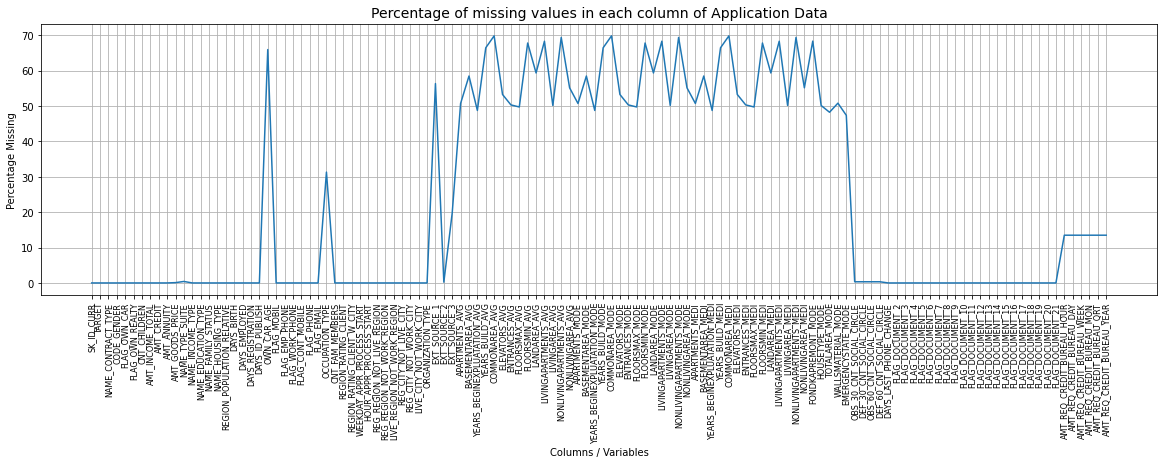

In [14]:
# Creating a chart for missing values

plt.figure(figsize = (20,5))
plt.plot(app_data_missing['index'], app_data_missing[0])
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Percentage of missing values in each column of Application Data', fontsize = 14)
plt.xlabel('Columns / Variables', fontsize = 10)
plt.ylabel('Percentage Missing', fontsize = 10)
plt.grid(b = True)
plt.show()

We can see that many of the variables have a high percentage of missing values.

Let us create a DataFrame of the columns that have more than 45% values as missing.

In [15]:
# Storing the variables having >45% missing values in a list

miss_cols = list(app_data_missing.loc[app_data_missing[0] > 45, 'index'])
len(miss_cols)

49

We can remove these 49 columns.

In [16]:
# Removing the high missing columns

application_data.drop(miss_cols, axis = 1, inplace = True)

In [17]:
# Checking the shape of application data again

application_data.shape

(307511, 73)

Let's start by first identifying the unnecessary columns based on our understanding from the columns_description file.<br>

The columns *FLAG_WORK_PHONE* and *FLAG_PHONE* both contain the information on whether the client provided home phone or not. Since, work phone information is captured in the *FLAG_EMP_PHONE* variable, we can remove the *FLAG_WORK_PHONE* variable.

In [18]:
# Dropping FLAG_WORK_PHONE variable

application_data.drop('FLAG_WORK_PHONE', axis = 1, inplace = True)

Now, we also do not have any context on what the variables *EXT_SOURCE_2* and *EXT_SOURCE_3* mean and how they relate to whether the client is more probable to default or not, we can remove these columns too.

In [19]:
# Dropping EXT_SOURCE_2, EXT_SOURCE_3 variables

application_data.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis = 1, inplace = True)

The column *NAME_TYPE_SUITE* which indicates who was accompanying the client while applying for the loan has no relation with whether the client will default or not, we can remove this column too. <br>
Similarly, the columns *WEEKDAY_APPR_PROCESS_START*, *HOUR_APPR_PROCESS_START*, *REG_REGION_NOT_LIVE_REGION*, *REG_REGION_NOT_WORK_REGION*, *LIVE_REGION_NOT_WORK_REGION*, *REG_CITY_NOT_LIVE_CITY*, *REG_CITY_NOT_WORK_CITY*, *LIVE_CITY_NOT_WORK_CITY* can also be removed.

In [20]:
# Removing unnecessary columns

application_data.drop(['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1, inplace = True)

Now, the columns of document flags are not individually important as we have no information about which document is being referred to. But, they can be a good indicator at an **aggregate** level. So, we can create another column *NUM_DOCS_ADDED* as the number of documents submitted.

In [21]:
# Creating the NUM_DOCS_ADDED Column

application_data['NUM_DOCS_ADDED'] = application_data['FLAG_DOCUMENT_2'] + application_data['FLAG_DOCUMENT_3'] + application_data['FLAG_DOCUMENT_4'] + application_data['FLAG_DOCUMENT_5'] + application_data['FLAG_DOCUMENT_6'] + application_data['FLAG_DOCUMENT_7'] + application_data['FLAG_DOCUMENT_8'] + application_data['FLAG_DOCUMENT_9'] + application_data['FLAG_DOCUMENT_10'] + application_data['FLAG_DOCUMENT_11'] + application_data['FLAG_DOCUMENT_12'] + application_data['FLAG_DOCUMENT_13'] + application_data['FLAG_DOCUMENT_14'] + application_data['FLAG_DOCUMENT_15'] + application_data['FLAG_DOCUMENT_16'] + application_data['FLAG_DOCUMENT_17'] + application_data['FLAG_DOCUMENT_18'] + application_data['FLAG_DOCUMENT_19'] + application_data['FLAG_DOCUMENT_20'] + application_data['FLAG_DOCUMENT_21']

Now, we can **remove the Document flag variables**.

In [22]:
# Removing Document flag variables

application_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1, inplace = True)

In [23]:
# Updated shape of Application Data

application_data.shape

(307511, 42)

We only have 42 columns now.

In [24]:
# Print percentage missing values of each column

print(100*application_data.isnull().sum()/application_data.shape[0])

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL      

The percentage of missing values for columns *AMT_ANNUITY*, *AMT_GOODS_PRICE*, *OBS_30_CNT_SOCIAL_CIRCLE*, *DEF_30_CNT_SOCIAL_CIRCLE*, *OBS_60_CNT_SOCIAL_CIRCLE*, *DEF_60_CNT_SOCIAL_CIRCLE*, *DAYS_LAST_PHONE_CHANGE* is very less. So, we can **remove these missing rows**.

In [25]:
# Removing missing values for AMT_ANNUITY
app_data_1 = application_data[~application_data['AMT_ANNUITY'].isnull()].copy()

# Removing missing values for AMT_GOODS_PRICE
app_data_2 = app_data_1[~app_data_1['AMT_GOODS_PRICE'].isnull()].copy()

# Removing missing values for OBS_30_CNT_SOCIAL_CIRCLE
app_data_3 = app_data_2[~app_data_2['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()].copy()

# Removing missing values for DEF_30_CNT_SOCIAL_CIRCLE
app_data_4 = app_data_3[~app_data_3['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()].copy()

# Removing missing values for OBS_60_CNT_SOCIAL_CIRCLE
app_data_5 = app_data_4[~app_data_4['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()].copy()

# Removing missing values for DEF_60_CNT_SOCIAL_CIRCLE
app_data_6 = app_data_5[~app_data_5['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()].copy()

# Removing missing values for DAYS_LAST_PHONE_CHANGE
app_data_7 = app_data_6[~app_data_6['DAYS_LAST_PHONE_CHANGE'].isnull()].copy()

In [26]:
# Shape of updated DataFrame

app_data_7.shape

(306199, 42)

So, we have 306199 rows in the data now, ehich is around **99.57% of the original data**. So, we are good to go with this data.

*OCCUPATION_TYPE* column is a categorical variable, let's look at the composition of the variable.

In [27]:
# Count of each instance of OCCUPATION_TYPE

100*app_data_7['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 26.163822
Sales staff              15.215685
Core staff               13.044326
Managers                 10.091298
Drivers                   8.826734
High skill tech staff     5.387005
Accountants               4.641017
Medicine staff            4.046796
Security staff            3.186150
Cooking staff             2.817437
Cleaning staff            2.203234
Private service staff     1.257428
Low-skill Laborers        0.994334
Waiters/barmen staff      0.639418
Secretaries               0.617534
Realty agents             0.355391
HR staff                  0.267376
IT staff                  0.245015
Name: OCCUPATION_TYPE, dtype: float64

Although Laborers make up a large percent of our data, it is not so high that we replace our missing values with it. So, let us **impute the missing values in this column with 'Unknown'**. In the machine learning model, this column, combined with *'NAME_INCOME_TYPE'* could indicate towards a person's occupation.

In [28]:
# Imputing missing values in OCCUPATION_TYPE with 'Unknown'

app_data_7['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

Now, let's look at *AMT_REQ_CREDIT_BUREAU* columns and how we can impute their missing values. <br>

Since these columns are numeric and represent the number of queries in the Credit Bureau about the client in the specified time period, we can **use the median of each column to impute the values**.

In [29]:
# Imputing missing values in AMT_REQ_CREDIT_BUREAU variables with the median of each column

app_data_7['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace = True)

app_data_7['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace = True)

app_data_7['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace = True)

app_data_7['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace = True)

app_data_7['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace = True)

app_data_7['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data_7['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace = True)

In [30]:
# Verifying whether all missing values are treated

print(100*app_data_7.isnull().sum()/app_data_7.shape[0])

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT

All missing values of the application dataset are cealned.

## Cleaning the Data types

In [31]:
# Looking at the dataset again

app_data_7.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS_ADDED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,1,1,0,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,1,1,0,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,1,0,0,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,1,0,0,Core staff,1.0,2,2,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1


We can see that the columns *DAYS_BIRTH*, *DAYS_EMPLOYED*, *DAYS_REGISTRATION*, *DAYS_PUBLISH* are negative. These should be in positive years or months. Let's **convert these to years**.

In [32]:
# Converting Negative Days to Positive Years

app_data_7['DAYS_BIRTH_YRS'] = app_data_7['DAYS_BIRTH'].apply(lambda x : (-1.0)*x/365)

app_data_7['DAYS_EMPLOYED_YRS'] = app_data_7['DAYS_EMPLOYED'].apply(lambda x: (-1.0)*x/365)

app_data_7['DAYS_REGISTRATION_YRS'] = app_data_7['DAYS_REGISTRATION'].apply(lambda x : (-1.0)*x/365)

app_data_7['DAYS_ID_PUBLISH_YRS'] = app_data_7['DAYS_ID_PUBLISH'].apply(lambda x : (-1.0)*x/365)

Now, we need to drop the older Days columns.

In [33]:
# Drop negative days columns

app_data_7.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], axis = 1, inplace = True)

Now, there are no columns that are of date type in this DataFrame. We only have the age/time since documents were changed which are recorded as float. We should not convert these to DateTime type.

Now, let's look at some variables where the DataType is not stored correctly. <br>
Let's look at CNT_FAM_MEMBERS which is stored as float. It should be stored as integer.

In [34]:
# Convert CNT_FAM_MEMBERS to int

app_data_7['CNT_FAM_MEMBERS'] = app_data_7.loc[:,'CNT_FAM_MEMBERS'].astype(int)

In [35]:
# Converting Social Circle variables to int

app_data_7['OBS_30_CNT_SOCIAL_CIRCLE'] = app_data_7.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)

app_data_7['DEF_30_CNT_SOCIAL_CIRCLE'] = app_data_7.loc[:,'DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)

app_data_7['OBS_60_CNT_SOCIAL_CIRCLE'] = app_data_7.loc[:,'OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)

app_data_7['DEF_60_CNT_SOCIAL_CIRCLE'] = app_data_7.loc[:,'DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)

## Handling Outliers and Binning

Now, we need to identify the outliers in our continuous variables. <br>
For this, we first need to identify the continuous variables in our dataset. So, let's look at the number of unique values in each variable.

In [36]:
# Unique values in each variable

app_data_7.nunique().sort_values()

FLAG_MOBIL                          1
FLAG_EMAIL                          2
FLAG_PHONE                          2
FLAG_CONT_MOBILE                    2
FLAG_OWN_REALTY                     2
FLAG_EMP_PHONE                      2
FLAG_OWN_CAR                        2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
CODE_GENDER                         3
NUM_DOCS_ADDED                      5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
AMT_REQ_CRED

We can see here that the variables REGION_POPULATION_RELATIVE, AMT_GOODS_PRICE, AMT_INCOME_TOTAL, DAYS_LAST_PHONE_CHANGE, AMT_CREDIT, DAYS_ID_PUBLISH_YRS, DAYS_EMPLOYED_YRS, AMT_ANNUITY, DAYS_REGISTRATION_YRS and DAYS_BIRTH_YRS are continuous variables since their number of unique values is large. 

Let's try to find outliers in variables AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTH_YRS.

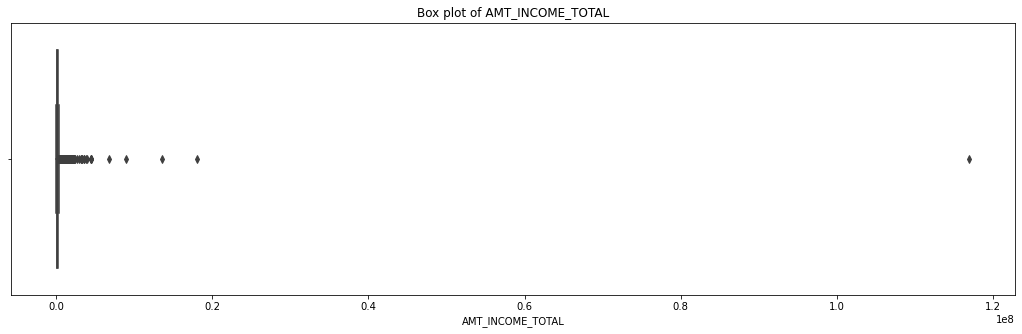

In [37]:
# Box plot for AMT_INCOME_TOTAL

plt.figure(figsize = (18,5))
sns.boxplot(app_data_7['AMT_INCOME_TOTAL'])
plt.title('Box plot of AMT_INCOME_TOTAL')
plt.show()

In [38]:
# Statistical summary of AMT_INCOME_TOTAL

app_data_7['AMT_INCOME_TOTAL'].describe()

count    3.061990e+05
mean     1.686648e+05
std      2.373632e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

We can see that one value is way higher than all other values. We can delete this value.

In [39]:
# Removing the outlier observation

app_data_7 = app_data_7[app_data_7['AMT_INCOME_TOTAL']< app_data_7['AMT_INCOME_TOTAL'].max()]

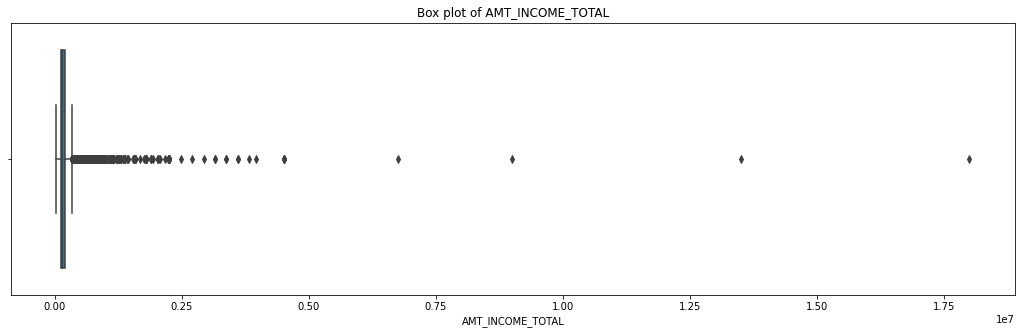

In [40]:
# Box plot for AMT_INCOME_TOTAL after removing the outlier

plt.figure(figsize = (18,5))
sns.boxplot(app_data_7['AMT_INCOME_TOTAL'])
plt.title('Box plot of AMT_INCOME_TOTAL')
plt.show()

Now, we can bin these values. For that, we first need to look at the distribution of the variable.

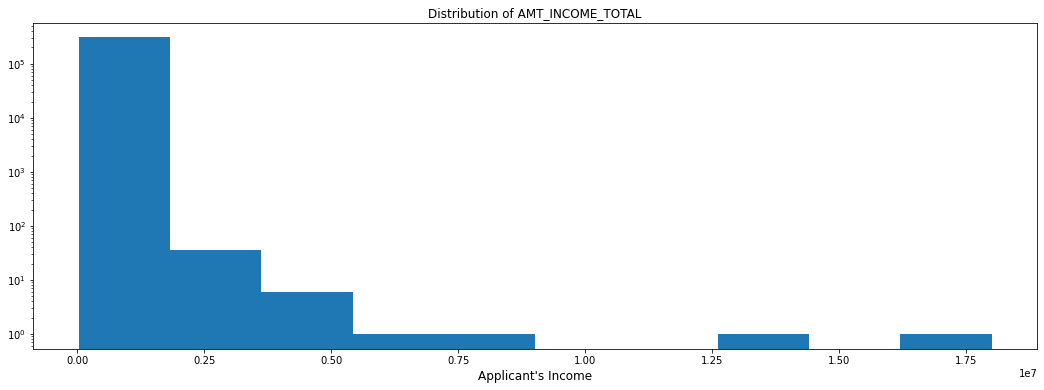

In [41]:
# Distribution of Applicant's income

plt.figure(figsize = (18,6))
plt.hist(app_data_7['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.xlabel("Applicant's Income",fontsize=12)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

To know more, we can look at the percentile values of the Income variable.

In [42]:
# Different percentiles of Income variable

app_data_7['AMT_INCOME_TOTAL'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25    112500.000
0.50    146250.000
0.75    202500.000
0.90    270000.000
0.95    337500.000
0.99    459022.545
Name: AMT_INCOME_TOTAL, dtype: float64

We can see that our median is just around 1.5 lakh. So, our bins have to be more dense below 1.5 lakh and sparse beyond that. Let's create these bins.

In [43]:
# Creating bins for Income variable

app_data_7['APPLICANT_INCOME'] = pd.cut(x=app_data_7['AMT_INCOME_TOTAL'],
                                    bins=[0, 50000, 100000, 150000, 300000, 500000, 1000000, 2000000, 100000000],
                                    labels=['<50k', '50k - 1lac', '1lac - 1.5lac', '1.5lac - 3lac', '3lac - 5lac', '5lac - 10lac', '10lac - 20lac', '>20lac'])

Let's see the composition of our new variable APPLICANT_INCOME.

In [44]:
# Value Counts of APPLICANT_INCOME

app_data_7['APPLICANT_INCOME'].value_counts(normalize = True, sort = False)

<50k             0.014703
50k - 1lac       0.192395
1lac - 1.5lac    0.298013
1.5lac - 3lac    0.421257
3lac - 5lac      0.064984
5lac - 10lac     0.007854
10lac - 20lac    0.000660
>20lac           0.000134
Name: APPLICANT_INCOME, dtype: float64

Now, let's see how our DAYS_BIRTH_YRS, which represents the age of the applicant, is distributed.

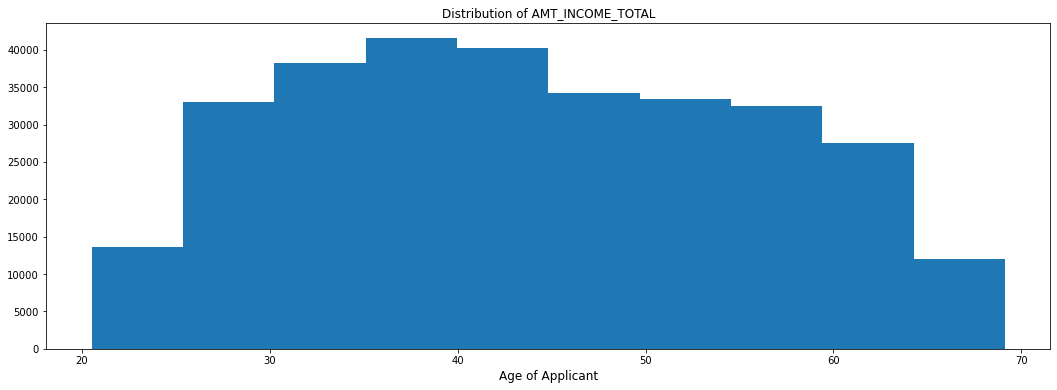

In [45]:
#Distribution of Applicant's age

plt.figure(figsize = (18,6))
plt.hist(app_data_7['DAYS_BIRTH_YRS'])
plt.xlabel("Age of Applicant",fontsize=12)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

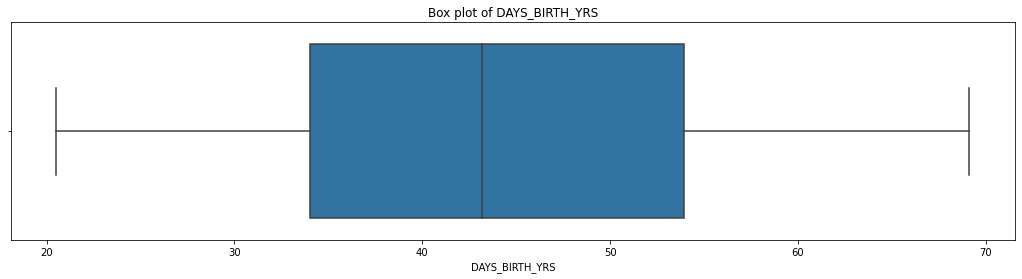

In [46]:
# Box plot of DAYS_BIRTH_YRS

plt.figure(figsize = (18,4))
sns.boxplot(app_data_7['DAYS_BIRTH_YRS'])
plt.title('Box plot of DAYS_BIRTH_YRS')
plt.show()

So, there are no outliers in the DAYS_BIRTH_YRS variable. But, we can still bin this variable as people of an age group tend to behave in a similar manner.

In [47]:
#Creating bins for Applicant's age

app_data_7['APPLICANT_AGE'] = pd.cut(x=app_data_7['DAYS_BIRTH_YRS'],
                                    bins=[0, 25, 40, 60, 80],
                                    labels=['<25 yrs', '25-40 yrs', '40-60 yrs', '>60 yrs'])

In [48]:
# Checking the composition of the APPLICANT_AGE variable

100*app_data_7['APPLICANT_AGE'].value_counts(normalize = True)

40-60 yrs    47.032639
25-40 yrs    37.452237
>60 yrs      11.580415
<25 yrs       3.934709
Name: APPLICANT_AGE, dtype: float64

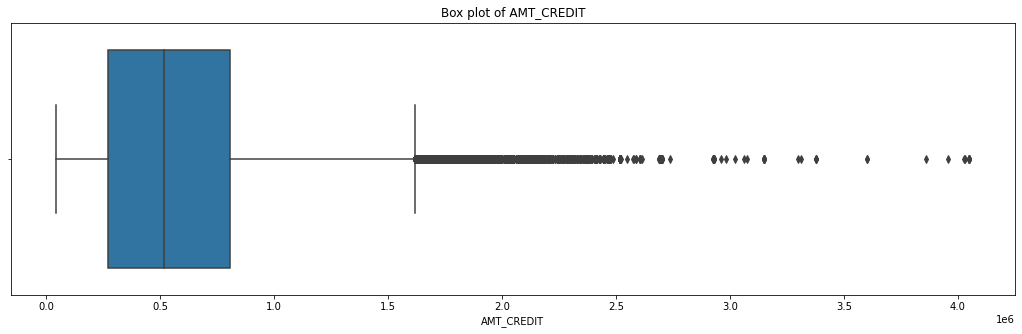

In [49]:
# Box plot of AMT_CREDIT

plt.figure(figsize = (18,5))
sns.boxplot(app_data_7['AMT_CREDIT'])
plt.title('Box plot of AMT_CREDIT')
plt.show()

In [51]:
# Different percentiles of the AMT_CREDIT variable

app_data_7['AMT_CREDIT'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25     270000.0
0.50     517500.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1862802.0
Name: AMT_CREDIT, dtype: float64

In [52]:
# Creating bins for AMT_CREDIT

app_data_7['LOAN_AMOUNT'] = pd.cut(x=app_data_7['AMT_CREDIT'],
                                    bins=[0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 5000000],
                                    labels=['<2.5lac', '2.5lac - 5lac', '5lac - 7.5lac', '7.5lac - 10lac', '10lac - 15lac', '15lac - 20lac', '>20lac'])

In [53]:
# Checking the composition of LOAN_AMOUNT variable

app_data_7['LOAN_AMOUNT'].value_counts(normalize = True, sort = False)

<2.5lac           0.191647
2.5lac - 5lac     0.292814
5lac - 7.5lac     0.212154
7.5lac - 10lac    0.140497
10lac - 15lac     0.127774
15lac - 20lac     0.028498
>20lac            0.006617
Name: LOAN_AMOUNT, dtype: float64

## Class Imbalance

We start our analysis by checking the imbalance in the data. Imbalance is the ratio of one value of Target variable vs the other.

In [54]:
# Counting number of rows for TARGET values of 1 and 0

print(app_data_7['TARGET'].value_counts(normalize = True))

print(app_data_7['TARGET'].value_counts(normalize = False))

0    0.919114
1    0.080886
Name: TARGET, dtype: float64
0    281431
1     24767
Name: TARGET, dtype: int64


So, imbalance for TARGET = 1 is 91.9114% and for TARGET = 0 is 8.0886%.

## Dividing dataset into 1 and 0

Now, we will divide the dataset into two parts - One with TARGET = 0 and one with TARGET = 1.

In [55]:
# Creating DataFrame with TARGET = 1

app_data_target_1 = app_data_7.loc[app_data_7['TARGET'] == 1]
app_data_target_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS_ADDED,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS,DAYS_REGISTRATION_YRS,DAYS_ID_PUBLISH_YRS,APPLICANT_INCOME,APPLICANT_AGE,LOAN_AMOUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,1,1,0,Laborers,1,2,2,Business Entity Type 3,2,2,2,2,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25.920548,1.745205,9.994521,5.808219,1.5lac - 3lac,25-40 yrs,2.5lac - 5lac
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,1,1,1,0,0,Cooking staff,1,3,2,Business Entity Type 3,10,1,10,0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,2,51.298630,7.200000,18.008219,5.005479,1lac - 1.5lac,40-60 yrs,7.5lac - 10lac
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1,1,1,0,0,Laborers,2,2,2,Business Entity Type 3,0,0,0,0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1,47.895890,3.457534,3.238356,2.819178,1.5lac - 3lac,40-60 yrs,10lac - 15lac
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,1,1,1,1,0,Sales staff,2,3,3,Self-employed,1,0,1,0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,1,36.668493,9.854795,0.123288,12.079452,1lac - 1.5lac,25-40 yrs,2.5lac - 5lac
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,1,0,1,0,0,Unknown,2,2,2,XNA,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,67.928767,-1000.665753,14.769863,11.504110,50k - 1lac,>60 yrs,2.5lac - 5lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Working,Secondary / secondary special,Married,House / apartment,0.020246,1,1,1,0,0,Laborers,3,3,3,Business Entity Type 3,0,0,0,0,-324.0,0.0,0.0,0.0,0.0,0.0,2.0,1,27.172603,8.350685,23.306849,7.068493,1.5lac - 3lac,25-40 yrs,2.5lac - 5lac
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Working,Higher education,Civil marriage,House / apartment,0.007330,1,1,1,0,0,Laborers,3,2,2,Construction,0,0,0,0,-1492.0,0.0,0.0,0.0,1.0,0.0,6.0,1,36.756164,6.589041,1.369863,12.887671,1lac - 1.5lac,25-40 yrs,10lac - 15lac
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Working,Secondary / secondary special,Married,House / apartment,0.008575,1,1,1,1,0,Managers,2,2,2,Business Entity Type 3,0,0,0,0,-2941.0,0.0,0.0,0.0,0.0,0.0,3.0,1,56.558904,8.621918,24.441096,10.498630,1.5lac - 3lac,40-60 yrs,2.5lac - 5lac
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,1,1,1,0,0,Sales staff,2,2,2,Business Entity Type 3,1,1,1,0,-307.0,0.0,0.0,0.0,0.0,1.0,2.0,1,45.126027,0.783562,22.715068,0.024658,1.5lac - 3lac,40-60 yrs,5lac - 7.5lac


In [56]:
# Creting DataFrame with TARGET = 0

app_data_target_0 = app_data_7.loc[app_data_7['TARGET'] == 0]
app_data_target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS_ADDED,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS,DAYS_REGISTRATION_YRS,DAYS_ID_PUBLISH_YRS,APPLICANT_INCOME,APPLICANT_AGE,LOAN_AMOUNT
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1,1,1,1,0,Core staff,2,1,1,School,1,0,1,0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45.931507,3.254795,3.249315,0.797260,1.5lac - 3lac,40-60 yrs,10lac - 15lac
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,0,Laborers,1,2,2,Government,0,0,0,0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52.180822,0.616438,11.671233,6.934247,50k - 1lac,40-60 yrs,<2.5lac
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,1,0,0,Laborers,2,2,2,Business Entity Type 3,2,0,2,0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,1,52.068493,8.326027,26.939726,6.676712,1lac - 1.5lac,40-60 yrs,2.5lac - 5lac
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,1,0,0,Core staff,1,2,2,Religion,0,0,0,0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1,54.608219,8.323288,11.810959,9.473973,1lac - 1.5lac,40-60 yrs,5lac - 7.5lac
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,0,Laborers,2,2,2,Other,0,0,0,0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,1,46.413699,4.350685,13.616438,1.306849,50k - 1lac,40-60 yrs,2.5lac - 5lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,1,0,1,1,0,Unknown,1,2,2,XNA,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,66.805479,-1000.665753,20.189041,6.457534,1lac - 1.5lac,>60 yrs,<2.5lac
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,1,1,1,0,0,Sales staff,1,1,1,Services,0,0,0,0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25.553425,0.646575,23.167123,5.430137,1.5lac - 3lac,25-40 yrs,2.5lac - 5lac
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,1,0,1,1,0,Unknown,1,2,2,XNA,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,56.917808,-1000.665753,12.021918,11.205479,50k - 1lac,40-60 yrs,2.5lac - 5lac
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,1,1,1,0,1,Managers,1,3,3,School,6,0,6,0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,1,41.002740,21.701370,18.457534,14.109589,1.5lac - 3lac,40-60 yrs,5lac - 7.5lac


In [57]:
# Confirming whether the new DataFrames have correct row counts

print(app_data_7['TARGET'].value_counts(),"\n",app_data_target_0.shape[0],"\n",app_data_target_1.shape[0])

0    281431
1     24767
Name: TARGET, dtype: int64 
 281431 
 24767


We can confirm that the two new dataframes have correct respective TARGET value and right row count.

## Univariate Analysis

### Categorical Unordered Univariate Analysis

In [58]:
# Data Types

app_data_target_0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                   int64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


So, our unordered categorical variables are NAME_CONTRACT_TYPE, CODE_GENDER, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE.

Let's look at these one by one for both Target = 0 an Target = 1

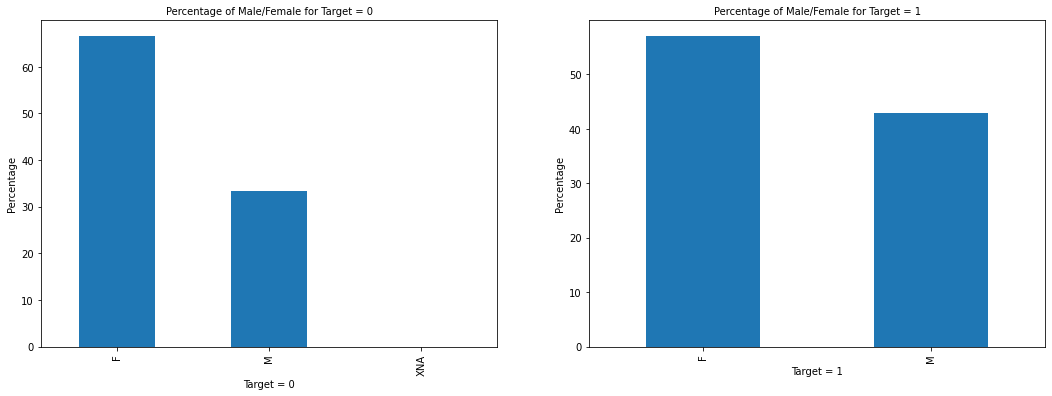

In [68]:
# Plotting the CODE_GENDER variable

plt.figure(figsize = (18,6))
plt.title('Applicant Gender')

plt.subplot(121)
plt.title('Percentage of Male/Female for Target = 0', fontsize = 10)
plt.xlabel('Target = 0')
plt.ylabel('Percentage')
(100*app_data_target_0['CODE_GENDER'].value_counts(normalize = True)).plot.bar()

plt.subplot(122)
plt.title('Percentage of Male/Female for Target = 1', fontsize = 10)
plt.xlabel('Target = 1')
plt.ylabel('Percentage')
(100*app_data_target_1['CODE_GENDER'].value_counts(normalize = True)).plot.bar()

In [69]:
app_data_target_0['CODE_GENDER'].value_counts(normalize = False)

F      187466
M       93961
XNA         4
Name: CODE_GENDER, dtype: int64

In [70]:
# Removing rows with Gender as 'XNA'

app_data_target_0 = app_data_target_0[~(app_data_target_0['CODE_GENDER'] == 'XNA')]

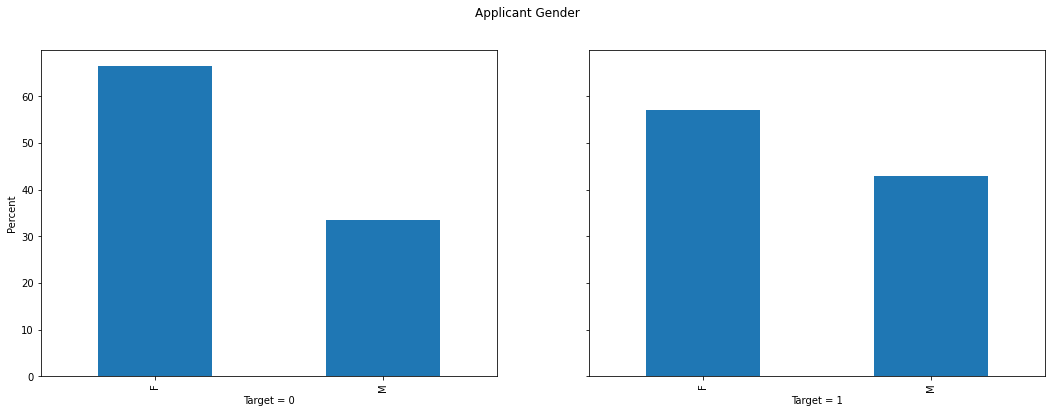

In [72]:
# Making the chart again

fig = plt.figure(figsize = (18,6))
fig.suptitle('Applicant Gender')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['CODE_GENDER'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['CODE_GENDER'].value_counts(normalize = True)).plot.bar()

Here, we can see that Males are more likely to default on a loan.

In [73]:
# Actual values
print(app_data_target_0['CODE_GENDER'].value_counts(normalize = True))
print(app_data_target_1['CODE_GENDER'].value_counts(normalize = True))

F    0.666127
M    0.333873
Name: CODE_GENDER, dtype: float64
F    0.570477
M    0.429523
Name: CODE_GENDER, dtype: float64


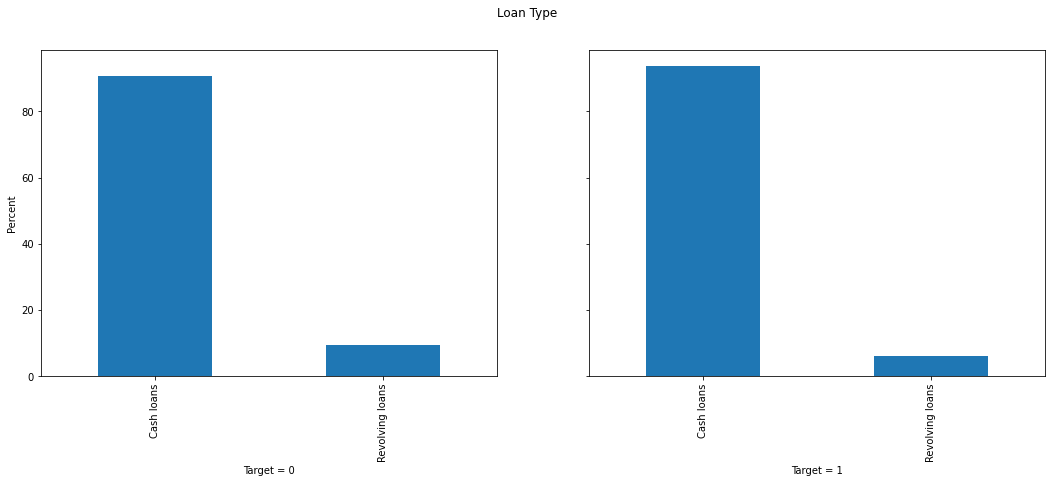

In [74]:
# Plotting the NAME_CONTRACT_TYPE variable

fig = plt.figure(figsize = (18,6))
fig.suptitle('Loan Type')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['NAME_CONTRACT_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['NAME_CONTRACT_TYPE'].value_counts(normalize = True)).plot.bar()

So, Revolving loans are less likely to default.

In [75]:
# Actual values
print(app_data_target_0['NAME_CONTRACT_TYPE'].value_counts(normalize = True))
print(app_data_target_1['NAME_CONTRACT_TYPE'].value_counts(normalize = True))

Cash loans         0.906086
Revolving loans    0.093914
Name: NAME_CONTRACT_TYPE, dtype: float64
Cash loans         0.937538
Revolving loans    0.062462
Name: NAME_CONTRACT_TYPE, dtype: float64


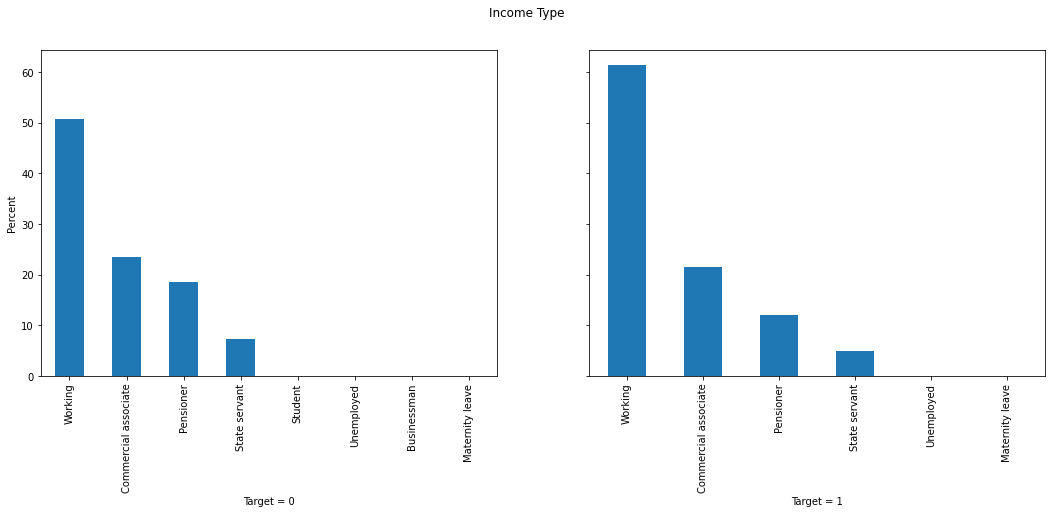

In [76]:
# Plotting NAME_INCOME_TYPE variable

fig = plt.figure(figsize = (18,6))
fig.suptitle('Income Type')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['NAME_INCOME_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['NAME_INCOME_TYPE'].value_counts(normalize = True)).plot.bar()

In [77]:
# Actual values
print(app_data_target_0['NAME_INCOME_TYPE'].value_counts(normalize = True))
print(app_data_target_1['NAME_INCOME_TYPE'].value_counts(normalize = True))

Working                 0.507830
Commercial associate    0.234150
Pensioner               0.185473
State servant           0.072399
Student                 0.000064
Unemployed              0.000039
Businessman             0.000036
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64
Working                 0.613316
Commercial associate    0.216013
Pensioner               0.120039
State servant           0.050228
Unemployed              0.000323
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64


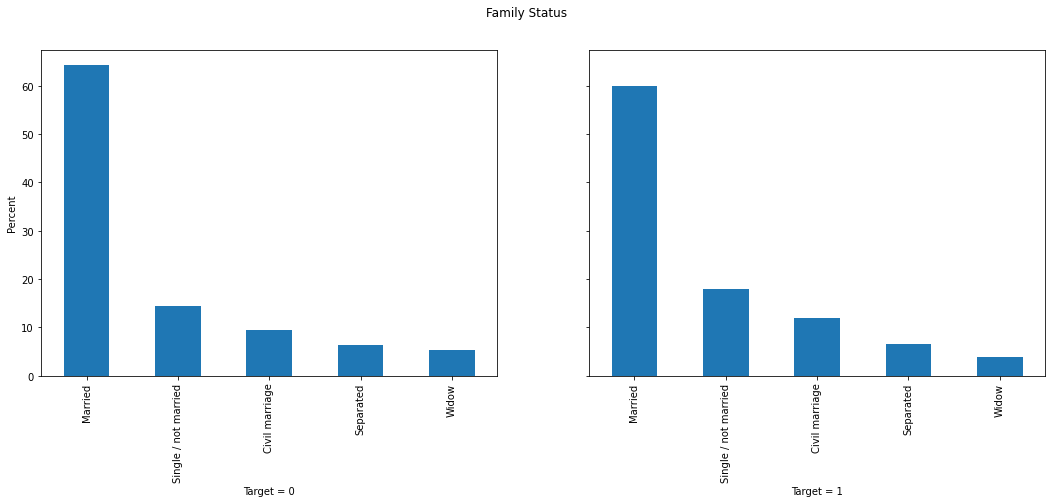

In [78]:
# Plotting NAME_FAMILY_STATUS variable

fig = plt.figure(figsize = (18,6))
fig.suptitle('Family Status')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['NAME_FAMILY_STATUS'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['NAME_FAMILY_STATUS'].value_counts(normalize = True)).plot.bar()

Married people are less likely to default while Single and Civil married people are more likely to default.

In [79]:
# Actual values
print(app_data_target_0['NAME_FAMILY_STATUS'].value_counts(normalize = True))
print(app_data_target_1['NAME_FAMILY_STATUS'].value_counts(normalize = True))

Married                 0.642582
Single / not married    0.144684
Civil marriage          0.094881
Separated               0.064208
Widow                   0.053644
Name: NAME_FAMILY_STATUS, dtype: float64
Married                 0.598296
Single / not married    0.179553
Civil marriage          0.119150
Separated               0.065208
Widow                   0.037792
Name: NAME_FAMILY_STATUS, dtype: float64


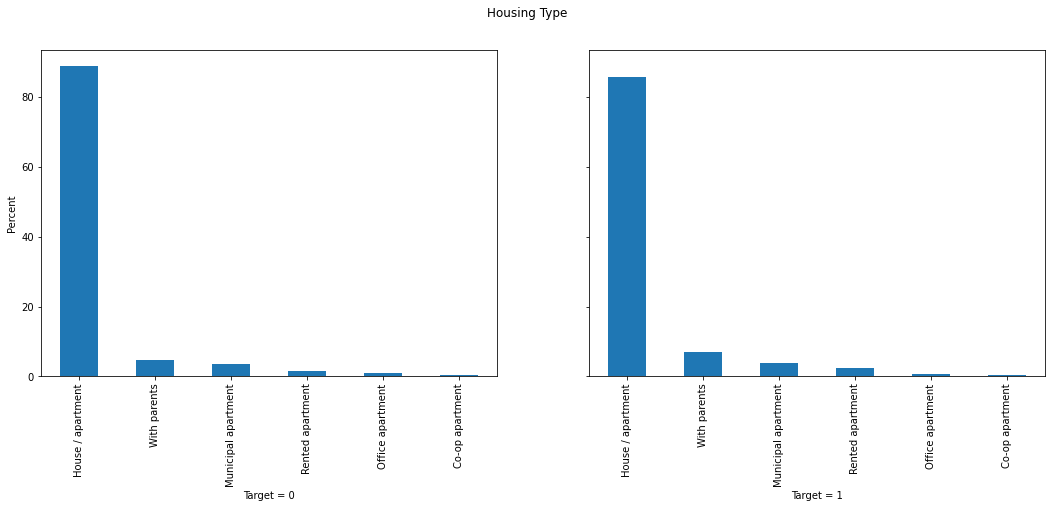

In [80]:
# Plotting NAME_HOUSING_TYPE variable

fig = plt.figure(figsize = (18,6))
fig.suptitle('Housing Type')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['NAME_HOUSING_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['NAME_HOUSING_TYPE'].value_counts(normalize = True)).plot.bar()

People living with parents or in a rented apartment are more likely to default.

In [81]:
# Actual values
print(app_data_target_0['NAME_HOUSING_TYPE'].value_counts(normalize = True))
print(app_data_target_1['NAME_HOUSING_TYPE'].value_counts(normalize = True))

House / apartment      0.890064
With parents           0.046357
Municipal apartment    0.036173
Rented apartment       0.015119
Office apartment       0.008642
Co-op apartment        0.003646
Name: NAME_HOUSING_TYPE, dtype: float64
House / apartment      0.856906
With parents           0.070053
Municipal apartment    0.038438
Rented apartment       0.024145
Office apartment       0.006904
Co-op apartment        0.003553
Name: NAME_HOUSING_TYPE, dtype: float64


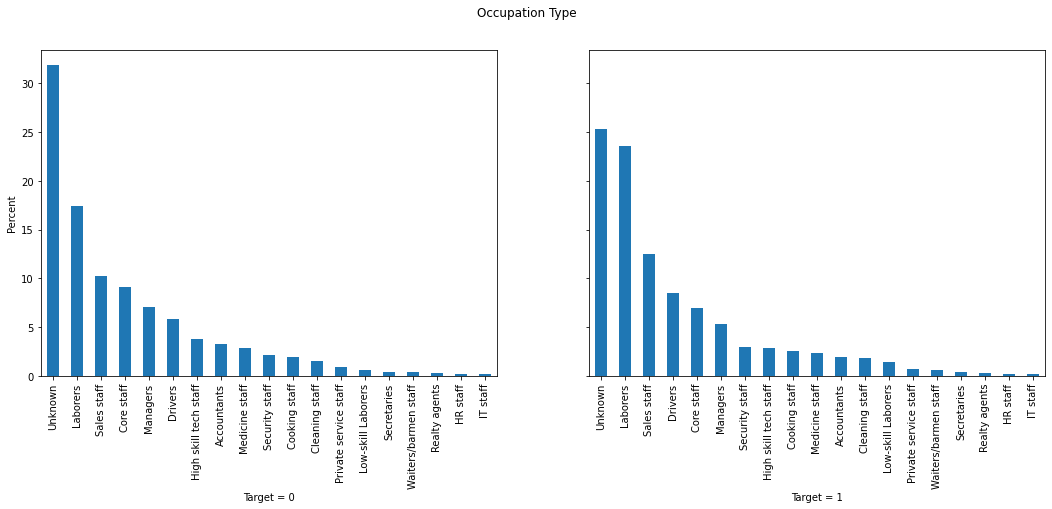

In [82]:
# Plotting OCCUPATION_TYPE variable

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('Occupation Type')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
(100*app_data_target_0['OCCUPATION_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['OCCUPATION_TYPE'].value_counts(normalize = True)).plot.bar()

Laborers, Sales staff, Drivers are more likely to default.

In [84]:
# Actual values
print(app_data_target_0['OCCUPATION_TYPE'].value_counts(normalize = True))
print(app_data_target_1['OCCUPATION_TYPE'].value_counts(normalize = True))

Unknown                  0.318889
Laborers                 0.174699
Sales staff              0.102687
Core staff               0.091263
Managers                 0.070665
Drivers                  0.058449
High skill tech staff    0.037750
Accountants              0.032978
Medicine staff           0.028199
Security staff           0.021242
Cooking staff            0.018836
Cleaning staff           0.014874
Private service staff    0.008777
Low-skill Laborers       0.006147
Secretaries              0.004285
Waiters/barmen staff     0.004236
Realty agents            0.002445
HR staff                 0.001869
IT staff                 0.001709
Name: OCCUPATION_TYPE, dtype: float64
Unknown                  0.252836
Laborers                 0.235313
Sales staff              0.124480
Drivers                  0.084952
Core staff               0.069972
Managers                 0.053458
Security staff           0.029031
High skill tech staff    0.028223
Cooking staff            0.025074
Medicine s

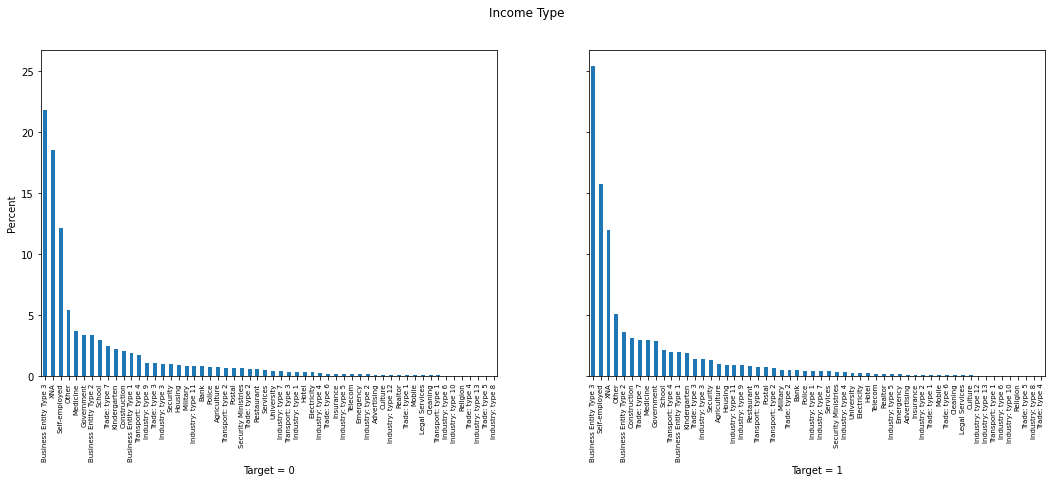

In [85]:
# Plotting ORGANIZATION_TYPE variable

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('Income Type')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
plt.ylabel('Percent')
plt.xticks(fontsize = 7)
(100*app_data_target_0['ORGANIZATION_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
plt.xticks(fontsize = 7)
(100*app_data_target_1['ORGANIZATION_TYPE'].value_counts(normalize = True)).plot.bar()

In [86]:
# Actual values
print(app_data_target_0['ORGANIZATION_TYPE'].value_counts(normalize = True))
print(app_data_target_1['ORGANIZATION_TYPE'].value_counts(normalize = True))

Business Entity Type 3    0.218010
XNA                       0.185480
Self-employed             0.122025
Other                     0.054529
Medicine                  0.036962
Government                0.034261
Business Entity Type 2    0.034140
School                    0.029645
Trade: type 7             0.025126
Kindergarten              0.022613
Construction              0.020993
Business Entity Type 1    0.019415
Transport: type 4         0.017337
Industry: type 9          0.011122
Trade: type 3             0.011072
Industry: type 3          0.010379
Security                  0.010344
Housing                   0.009647
Military                  0.008844
Industry: type 11         0.008738
Bank                      0.008350
Police                    0.007871
Agriculture               0.007785
Transport: type 2         0.007195
Postal                    0.006979
Security Ministries       0.006638
Trade: type 2             0.006222
Restaurant                0.005646
Services            

### Categorical Ordered Univariate Analysis

Let's first identify the Ordered Categorical variables in our dataset. 

In [87]:
app_data_target_0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                   int64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


The variables FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_EDUCATION_TYPE, APPLICANT_INCOME, APPLICANT_AGE, LOAN_AMOUNT are all Ordered Categorical variables. Let's look at these one by one.

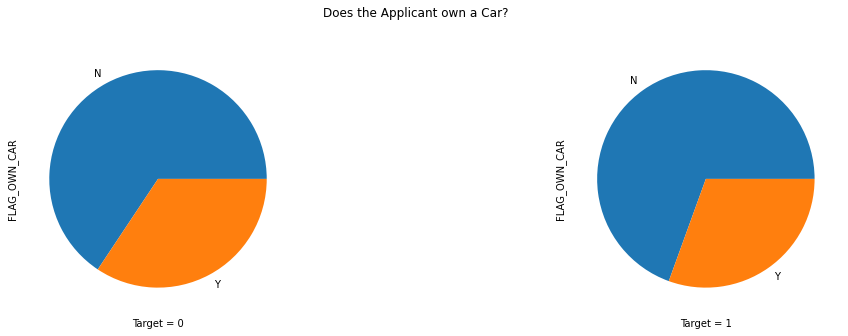

In [89]:
# Plotting the FLAG_OWN_CAR

fig = plt.figure(figsize = (18,5))
fig.suptitle('Does the Applicant own a Car?')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['FLAG_OWN_CAR'].value_counts(normalize = True)).plot.pie()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['FLAG_OWN_CAR'].value_counts(normalize = True)).plot.pie()

People who do not own a car are more likely to default.

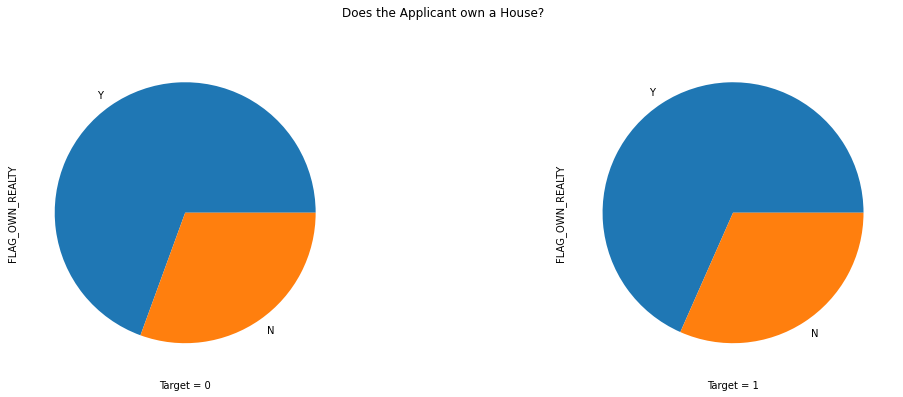

In [90]:
# Plotting the FLAG_OWN_REALTY

fig = plt.figure(figsize = (18,6))
fig.suptitle('Does the Applicant own a House?')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['FLAG_OWN_REALTY'].value_counts(normalize = True)).plot.pie()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['FLAG_OWN_REALTY'].value_counts(normalize = True)).plot.pie()

People who do not own a house are more likely to default.

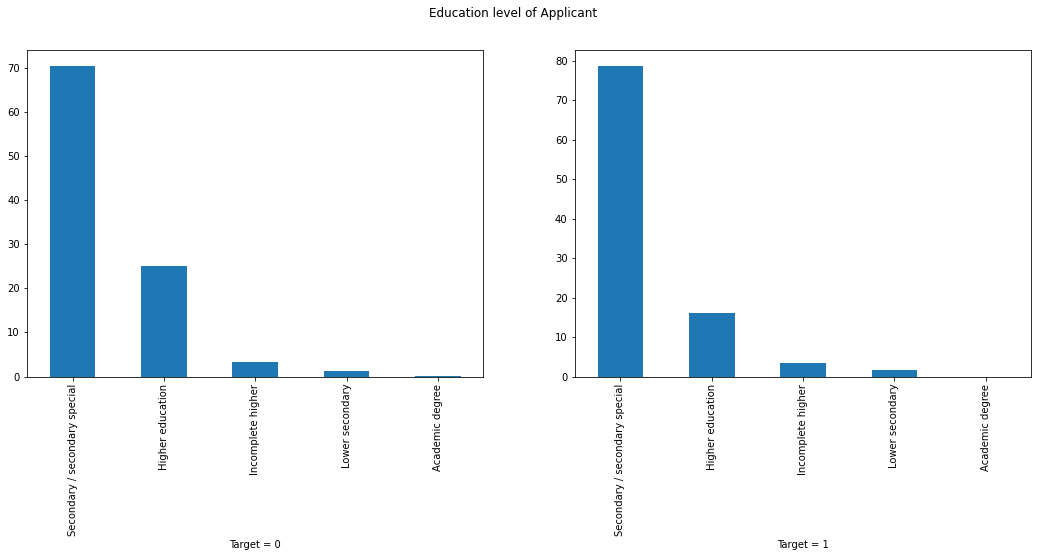

In [91]:
# Plotting the NAME_EDUCATION_TYPE

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('Education level of Applicant')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['NAME_EDUCATION_TYPE'].value_counts(normalize = True)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['NAME_EDUCATION_TYPE'].value_counts(normalize = True)).plot.bar()

People with a higher level of education are less likely to default.

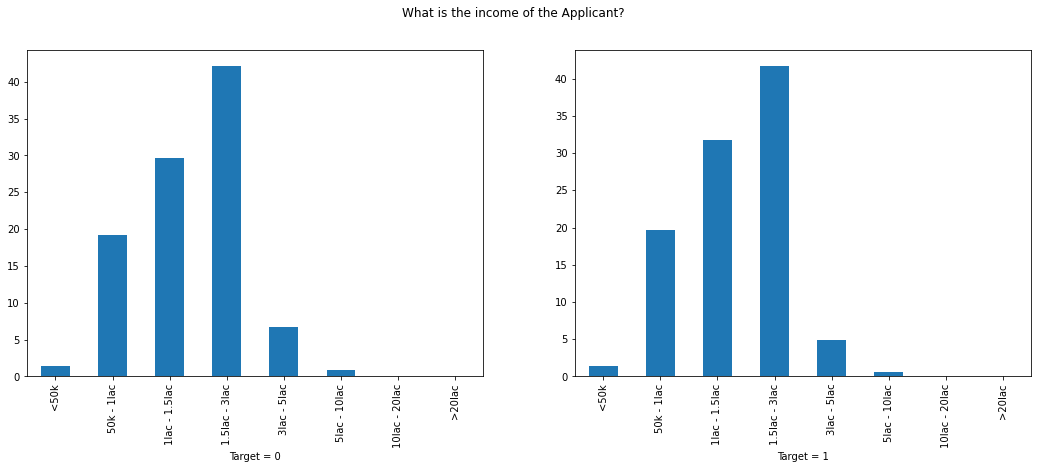

In [93]:
# Plotting the APPLICANT_INCOME

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('What is the income of the Applicant?')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['APPLICANT_INCOME'].value_counts(normalize = True, sort = False)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['APPLICANT_INCOME'].value_counts(normalize = True, sort = False)).plot.bar()

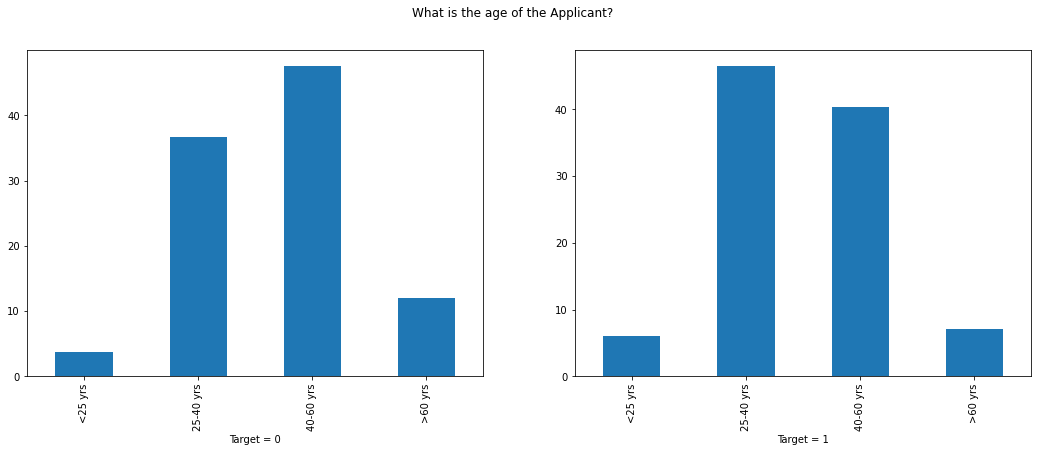

In [94]:
# Plotting the APPLICANT_AGE

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('What is the age of the Applicant?')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['APPLICANT_AGE'].value_counts(normalize = True, sort = False)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['APPLICANT_AGE'].value_counts(normalize = True, sort = False)).plot.bar()

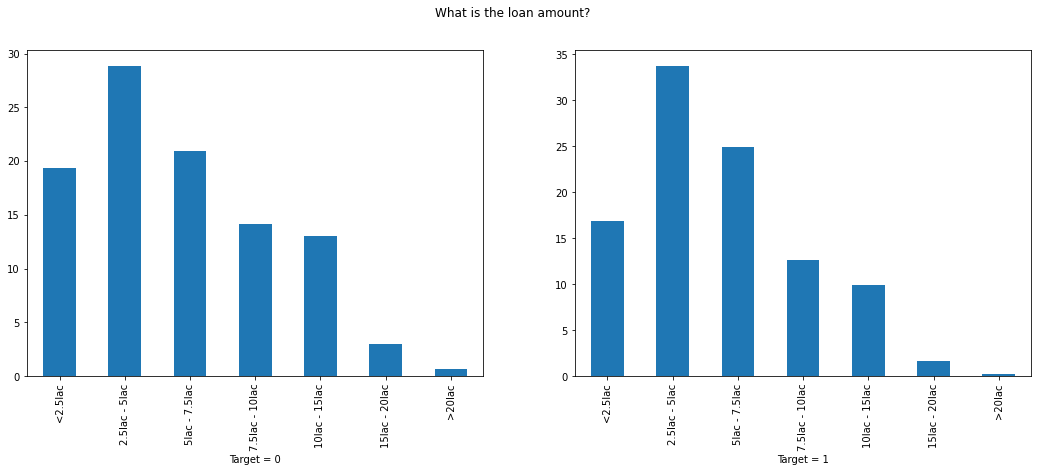

In [95]:
# Plotting the LOAN_AMOUNT

fig = plt.figure(1, figsize = (18,6))
fig.suptitle('What is the loan amount?')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target = 0')
(100*app_data_target_0['LOAN_AMOUNT'].value_counts(normalize = True, sort = False)).plot.bar()

plt.subplot(ax2)
plt.xlabel('Target = 1')
(100*app_data_target_1['LOAN_AMOUNT'].value_counts(normalize = True, sort = False)).plot.bar()

### Numerical variables

Let's see the statistical summary of our DataFrames. 

In [96]:
# Statistical summary of Target = 0

app_data_target_0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS_ADDED,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS,DAYS_REGISTRATION_YRS,DAYS_ID_PUBLISH_YRS
count,281427.000000,281427.0,281427.000000,2.814270e+05,2.814270e+05,281427.000000,2.814270e+05,281427.000000,281427.0,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000,281427.000000
mean,278235.045632,0.0,0.412974,1.689262e+05,6.034401e+05,27189.893246,5.430248e+05,0.021000,1.0,0.814481,0.998145,0.284369,0.056889,2.150437,2.044218,2.023050,1.415941,0.139152,1.399116,0.096679,-977.138068,0.005533,0.006026,0.029851,0.235226,0.231151,1.773362,0.931510,44.223192,-180.161479,13.781432,8.267785
std,102820.259337,0.0,0.718889,1.101016e+05,4.069453e+05,14641.618516,3.738029e+05,0.013955,0.0,0.388719,0.043028,0.451114,0.231630,0.906924,0.508195,0.501784,2.403084,0.439772,2.381999,0.355714,831.540410,0.078050,0.103758,0.191312,0.870245,0.756564,1.762193,0.345495,11.955265,391.586427,9.694695,4.127049
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,-1000.665753,-0.000000,-0.000000
25%,189099.500000,0.0,0.000000,1.125000e+05,2.700000e+05,16483.500000,2.385000e+05,0.010006,1.0,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1587.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,34.353425,0.761644,5.602740,4.810959
50%,278354.000000,0.0,0.000000,1.485000e+05,5.185620e+05,24907.500000,4.500000e+05,0.018850,1.0,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-777.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,43.506849,3.383562,12.452055,9.030137
75%,367222.500000,0.0,1.000000,2.025000e+05,8.100000e+05,34780.500000,6.885000e+05,0.028663,1.0,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,54.235616,7.706849,20.684932,11.816438
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,1.0,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,3.000000,69.120548,49.073973,67.594521,19.717808


In [97]:
# Statistical summary of Target = 1

app_data_target_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS_ADDED,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS,DAYS_REGISTRATION_YRS,DAYS_ID_PUBLISH_YRS
count,24767.000000,24767.0,24767.000000,2.476700e+04,2.476700e+04,24767.000000,2.476700e+04,24767.000000,24767.0,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000,24767.000000
mean,277450.275932,1.0,0.463924,1.609747e+05,5.584670e+05,26512.949994,4.893012e+05,0.019133,1.0,0.879598,0.998183,0.244882,0.055396,2.181370,2.153793,2.134978,1.495942,0.191909,1.477611,0.138168,-808.465741,0.005491,0.006662,0.028909,0.188598,0.215165,1.851698,0.951548,40.780022,-116.066842,12.291737,7.486913
std,102390.834294,0.0,0.757197,8.735539e+04,3.464913e+05,12444.795552,3.117263e+05,0.011910,0.0,0.325438,0.042588,0.430026,0.228757,0.951613,0.505210,0.500092,2.377698,0.516265,2.355536,0.427361,757.918431,0.077109,0.097182,0.186054,0.683088,0.594002,1.802112,0.281883,11.484046,327.260246,9.040016,4.155570
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.035616,-1000.665753,-0.000000,-0.000000
25%,189540.500000,1.0,0.000000,1.125000e+05,2.844000e+05,17406.000000,2.385000e+05,0.009630,1.0,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.224658,1.036986,4.572603,3.816438
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25317.000000,4.500000e+05,0.018634,1.0,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-595.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.126027,2.835616,11.112329,7.663014
75%,366038.500000,1.0,1.000000,2.025000e+05,7.353562e+05,32998.500000,6.750000e+05,0.025164,1.0,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-194.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,49.415068,5.912329,18.208219,11.287671
max,456254.000000,1.0,11.000000,3.150000e+06,4.027680e+06,149211.000000,3.600000e+06,0.072508,1.0,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,3.000000,30.000000,6.000000,29.000000,5.000000,0.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000,4.000000,68.953425,44.024658,62.816438,17.005479


Now, let's plot the box plots of the variables CNT_CHILDREN, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, NUM_DOCS_ADDED, DAYS_LAST_PHONE_CHANGE.

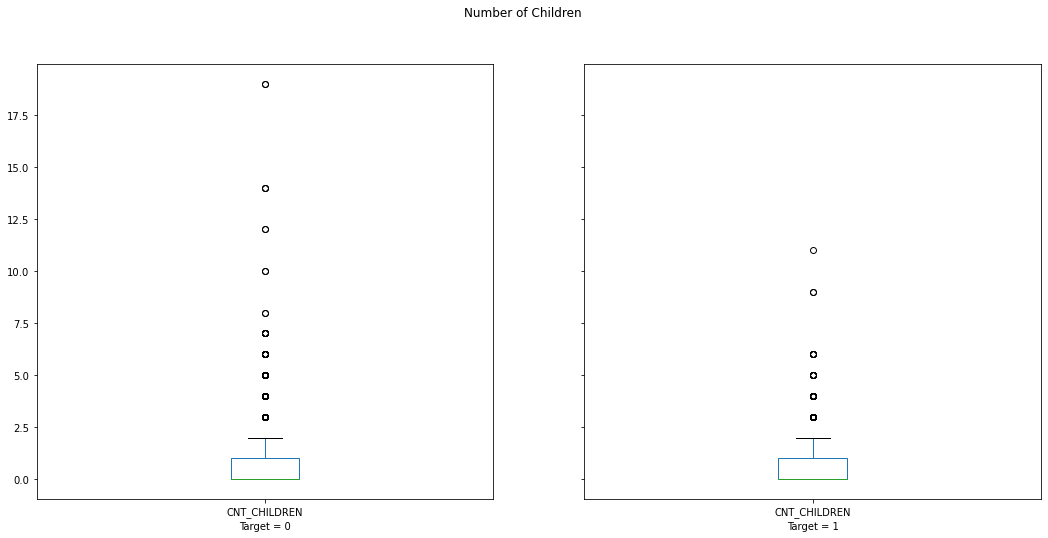

In [98]:
# Box plots of CNT_CHILDREN

fig = plt.figure(1, figsize = (18,8))
fig.suptitle('Number of Children')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
app_data_target_0['CNT_CHILDREN'].plot.box()

plt.subplot(ax2)
plt.xlabel('Target = 1')
app_data_target_1['CNT_CHILDREN'].plot.box()

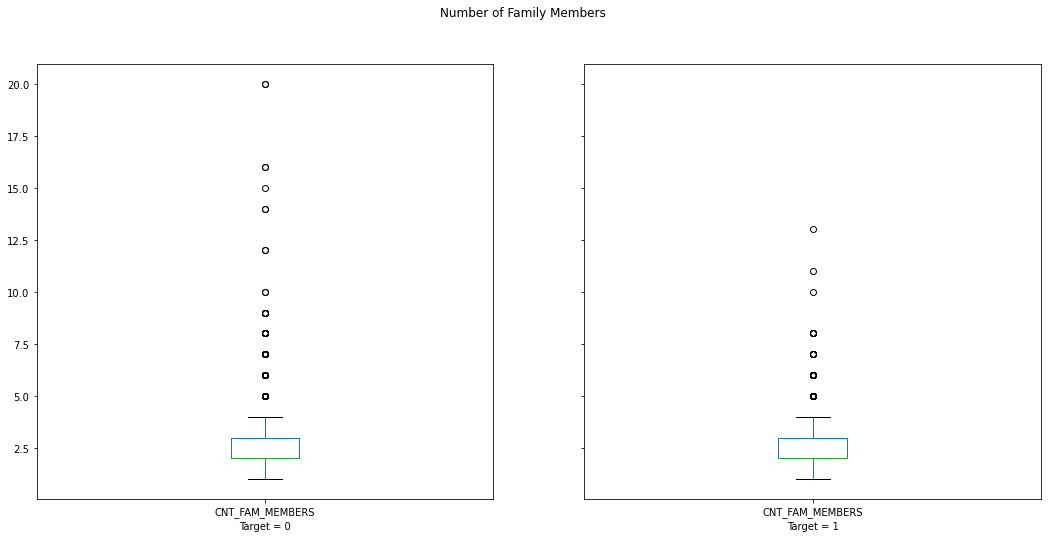

In [99]:
# Box plots of CNT_FAM_MEMBERS

fig = plt.figure(1, figsize = (18,8))
fig.suptitle('Number of Family Members')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
app_data_target_0['CNT_FAM_MEMBERS'].plot.box()

plt.subplot(ax2)
plt.xlabel('Target = 1')
app_data_target_1['CNT_FAM_MEMBERS'].plot.box()

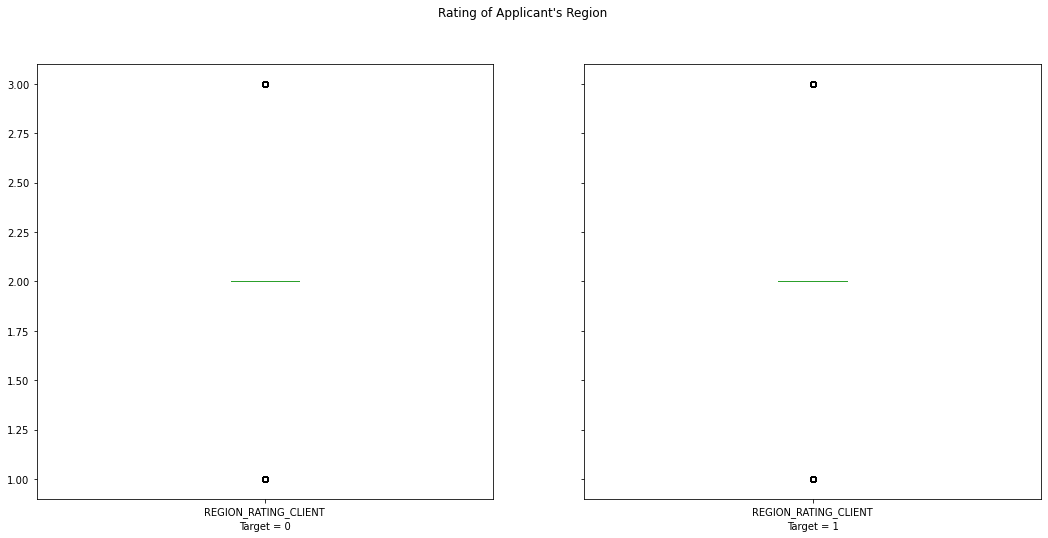

In [100]:
# Box plots of REGION_RATING_CLIENT

fig = plt.figure(1, figsize = (18,8))
fig.suptitle('Rating of Applicant\'s Region')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
app_data_target_0['REGION_RATING_CLIENT'].plot.box()

plt.subplot(ax2)
plt.xlabel('Target = 1')
app_data_target_1['REGION_RATING_CLIENT'].plot.box()

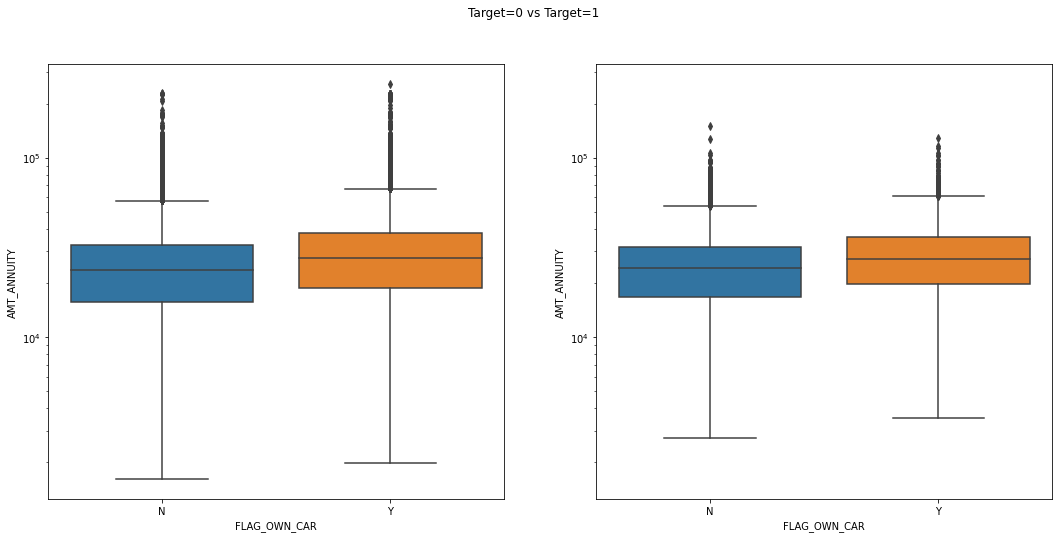

In [101]:
# Box plots of FLAG_OWN_CAR vs AMT_ANNUITY

fig = plt.figure(1, figsize = (18,8))
fig.suptitle("Target=0 vs Target=1")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
#plt.xlabel('Target = 0')
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_ANNUITY', data=app_data_target_0)
plt.yscale('log')

plt.subplot(ax2)
#plt.xlabel('Target = 1')
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_ANNUITY', data=app_data_target_1)
plt.yscale('log')

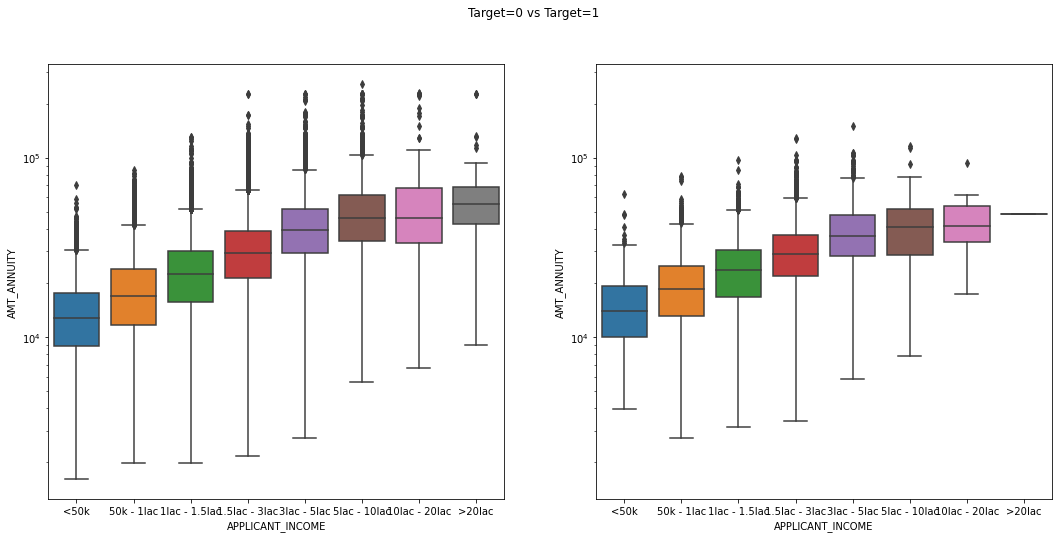

In [102]:
# Box plots of APPLICANT_INCOME vs AMT_ANNUITY

fig = plt.figure(1, figsize = (18,8))
fig.suptitle("Target=0 vs Target=1")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
#plt.xlabel('Target = 0')
sns.boxplot(x="APPLICANT_INCOME", y='AMT_ANNUITY', data=app_data_target_0)
plt.yscale('log')

plt.subplot(ax2)
#plt.xlabel('Target = 1')
sns.boxplot(x="APPLICANT_INCOME", y='AMT_ANNUITY', data=app_data_target_1)
plt.yscale('log')

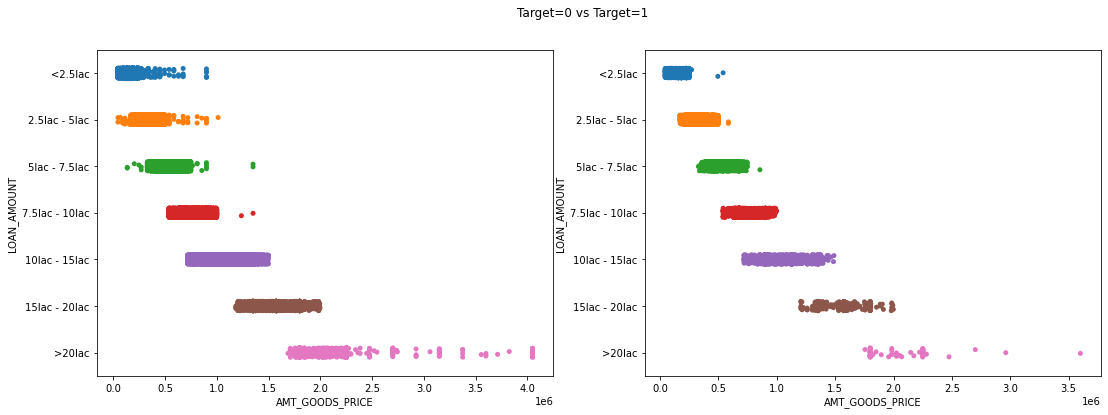

In [108]:
# Strip Plots of AMT_GOODS PRICE vs LOAN AMOUNT

fig = plt.figure(1, figsize = (18,6))
fig.suptitle("Target=0 vs Target=1")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
sns.stripplot(x='AMT_GOODS_PRICE', y="LOAN_AMOUNT", data=app_data_target_0)

plt.subplot(ax2)
sns.stripplot(x='AMT_GOODS_PRICE', y="LOAN_AMOUNT", data=app_data_target_1)

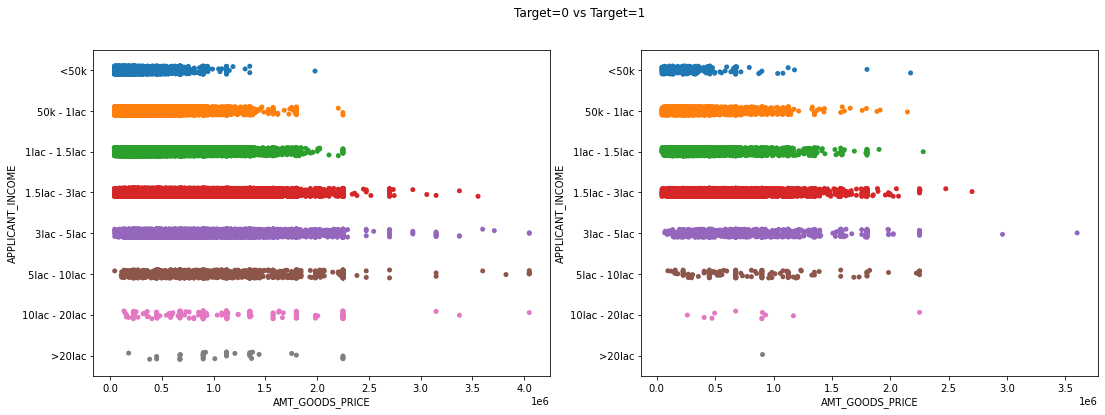

In [107]:
# Strip plot for AMT_GOODS_PRICE vs APLICANT_INCOME

fig = plt.figure(1, figsize = (18,6))
fig.suptitle("Target=0 vs Target=1")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
sns.stripplot(x='AMT_GOODS_PRICE', y="APPLICANT_INCOME", data=app_data_target_0)

plt.subplot(ax2)
sns.stripplot(x="AMT_GOODS_PRICE", y="APPLICANT_INCOME", data=app_data_target_1)


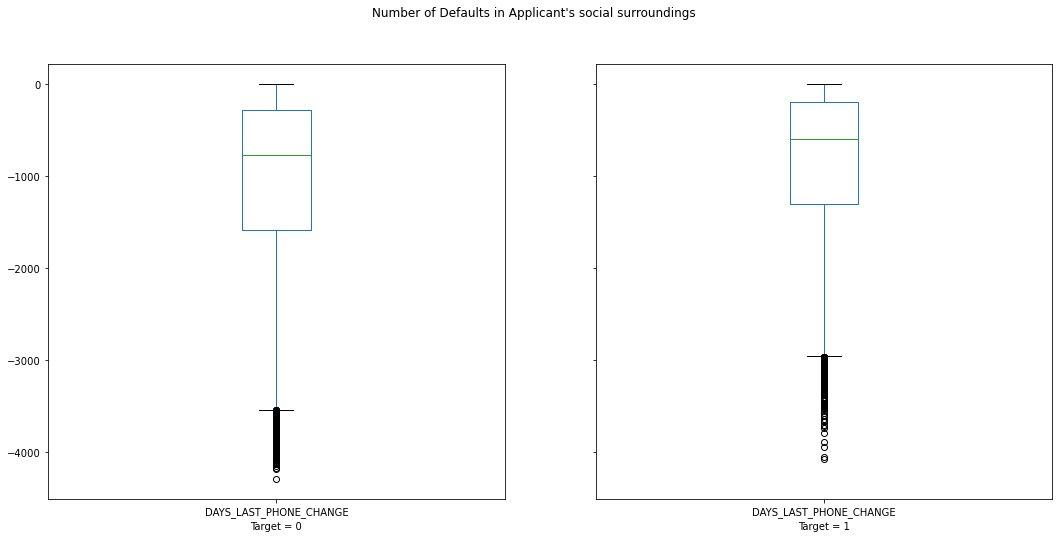

In [106]:
# Box plots of DAYS_LAST_PHONE_CHANGE

fig = plt.figure(1, figsize = (18,8))
fig.suptitle('Number of Defaults in Applicant\'s social surroundings')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

plt.subplot(ax1)
plt.xlabel('Target = 0')
app_data_target_0['DAYS_LAST_PHONE_CHANGE'].plot.box()

plt.subplot(ax2)
plt.xlabel('Target = 1')
app_data_target_1['DAYS_LAST_PHONE_CHANGE'].plot.box()

## Bivariate Analysis

### Numeric - Numeric Analysis

Let's first see which numerical columns we have.

In [109]:
# Checking dtypes again

app_data_target_0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                   int64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


So, the numerical columns are AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR, DAYS_BIRTH_YRS, DAYS_EMPLOYED_YRS, DAYS_REGISTRATION_YRS.

Let's look at the relation between Income and Loan amount.

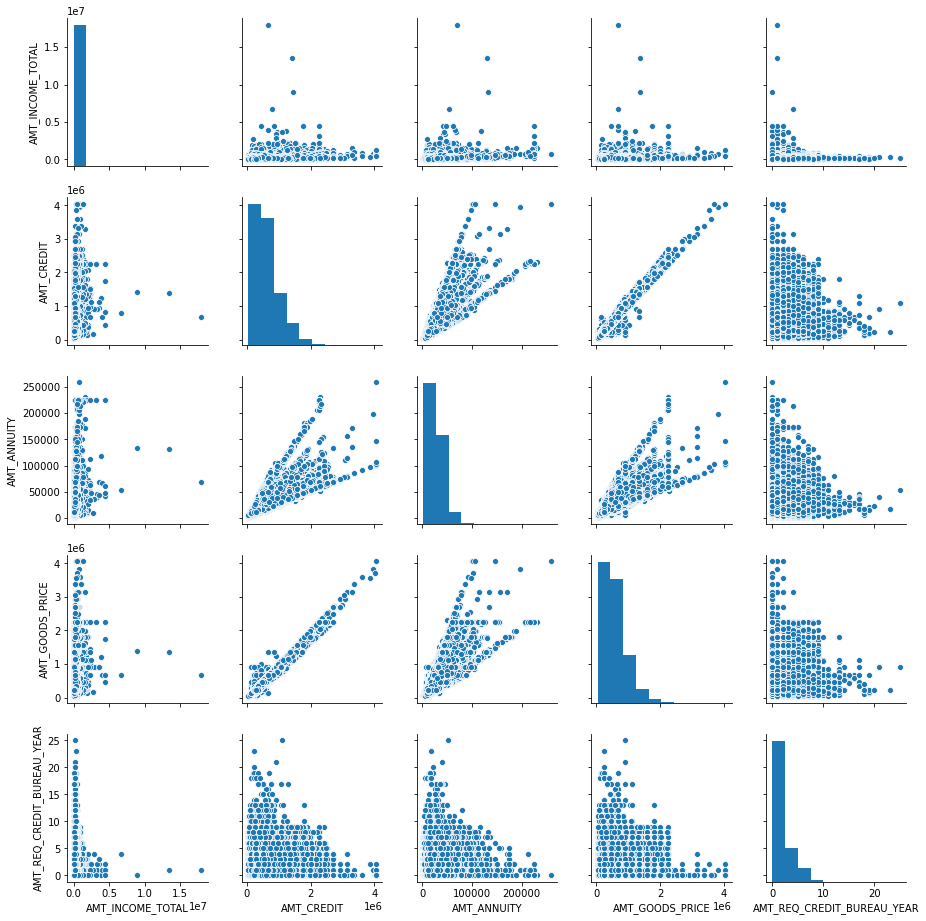

In [110]:
sns.pairplot(data = app_data_target_0, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

Let's look at the same variables for Target = 1.

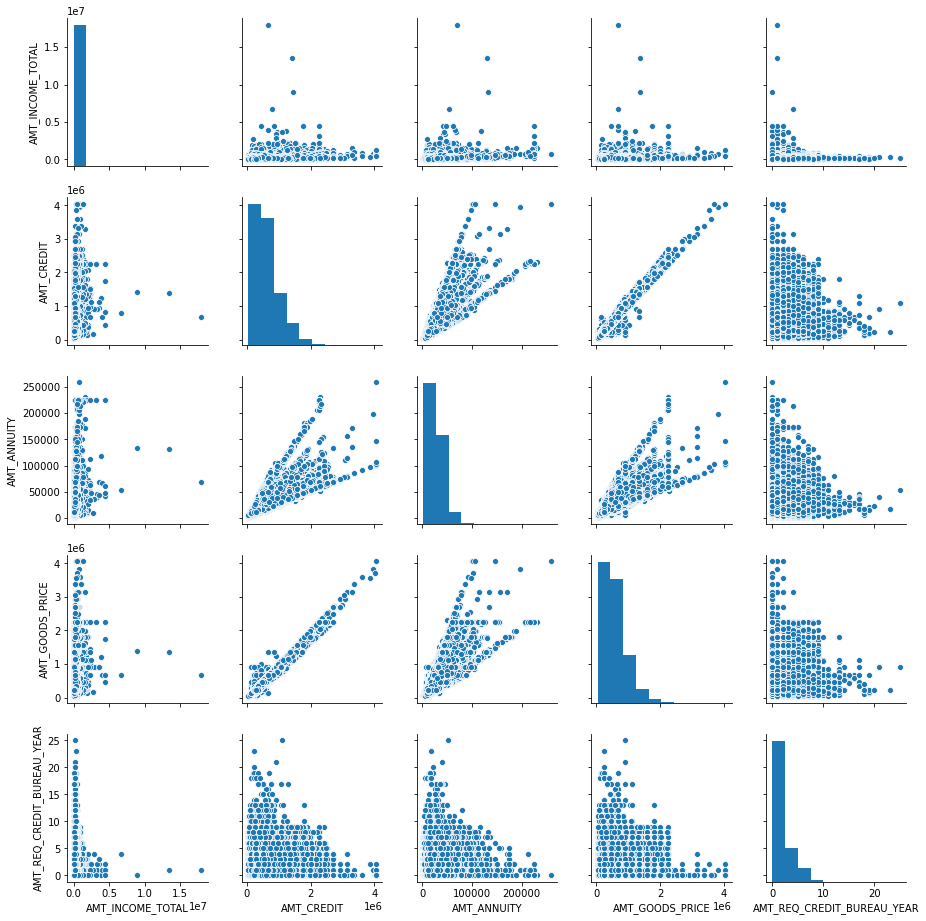

In [111]:
sns.pairplot(data = app_data_target_0, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

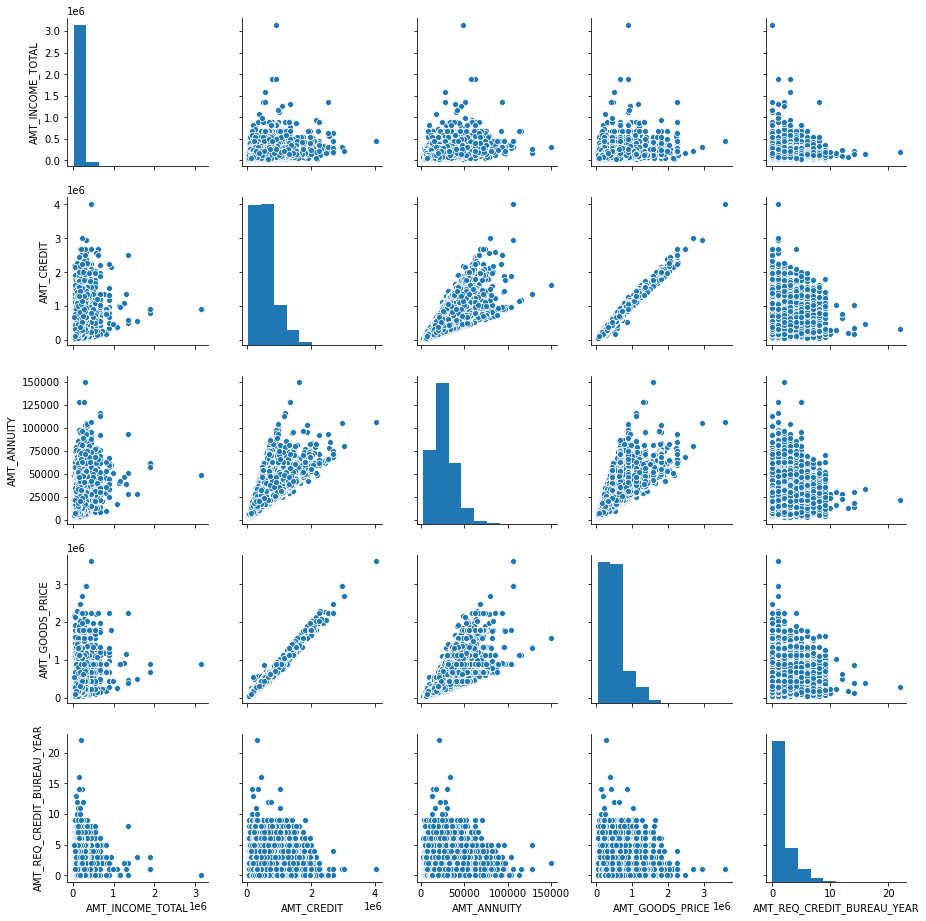

In [112]:
sns.pairplot(data = app_data_target_1, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

Let's see the correlation between AMT_CREDIT, AMT_ANNUITY, AMT_INCOME_TOTAL, CNT_CHILDREN, DAYS_EMPLOYED_YRS, DAYS_BIRTH_YRS

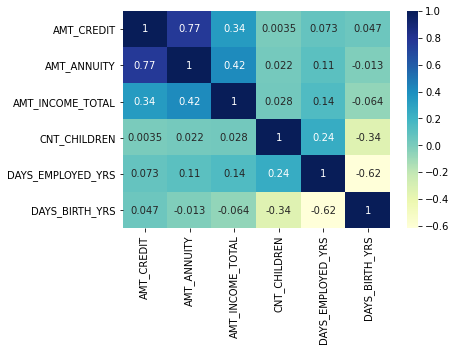

In [113]:
#Creating the Correlation Matrix for Target = 0

curr_0 = app_data_target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_EMPLOYED_YRS', 'DAYS_BIRTH_YRS']]

cor_0 = curr_0.corr()

sns.heatmap(cor_0, cmap = "YlGnBu", annot = True)

plt.show()

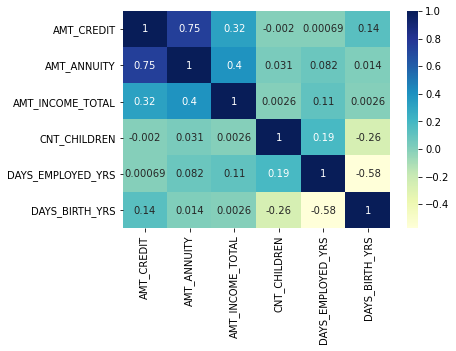

In [114]:
#Creating the Correlation Matrix for Target = 0

curr_1 = app_data_target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_EMPLOYED_YRS', 'DAYS_BIRTH_YRS']]

cor_1 = curr_1.corr()

sns.heatmap(cor_1, cmap = "YlGnBu", annot = True)

plt.show()

## EDA on Previous Application Data

Let's repeat all the processes done with the Application Data file.

In [115]:
# Get percentage of missing data for each column and save it in another DataFrame

prev_app_data_missing = pd.DataFrame(100*prev_application.isnull().sum()/prev_application.shape[0]).reset_index()

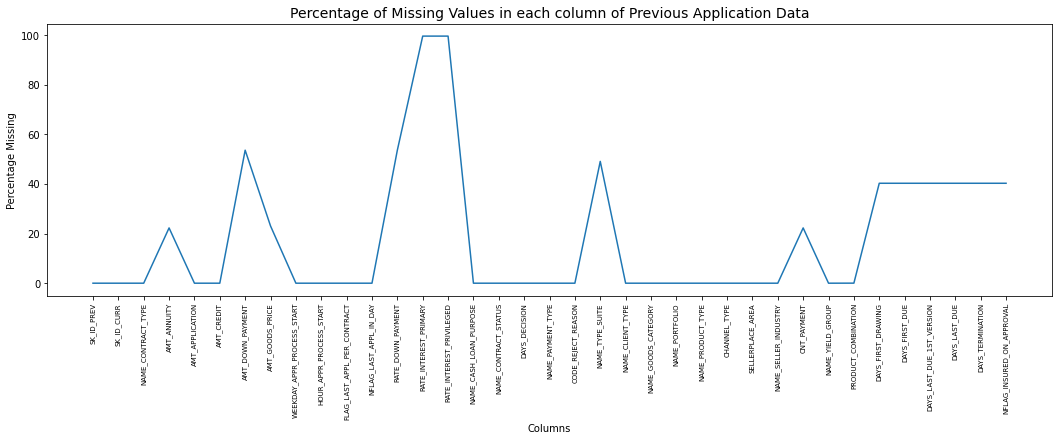

<Figure size 432x288 with 0 Axes>

In [116]:
# Creating chart for missing values 

plt.figure(figsize = (18,5))
plt.plot(prev_app_data_missing['index'], prev_app_data_missing[0])
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of Missing Values in each column of Previous Application Data', fontsize = 14)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Percentage Missing', fontsize = 10)
plt.figure()
plt.show()

In [117]:
# Displaying the Missing percentage values as a DataFrame

prev_app_data_missing

,index,0
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [118]:
# Getting the list of columns with > 45% data as missing

miss_cols_prev_app_data = list(prev_app_data_missing.loc[prev_app_data_missing[0] > 45, 'index'])
print(len(miss_cols_prev_app_data))

5


In [119]:
# Dropping the columns from Application Data

prev_application.drop(miss_cols_prev_app_data, axis = 1, inplace = True)

In [120]:
# Print percentage missing values of each column

print(100*prev_application.isnull().sum()/prev_application.shape[0])

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [121]:
# Removing missing values for PRODUCT_COMBINATION

prev_app_data_1 = prev_application[~prev_application['PRODUCT_COMBINATION'].isnull()].copy()

In [122]:
prev_app_data_1.shape[0]

1669868

This represents 99.97% of the original data.

In [123]:
prev_app_data_1['DAYS_LAST_DUE'].median()

-537.0

In [124]:
# Imputing missing values with median

prev_app_data_1['AMT_ANNUITY'].fillna(prev_app_data_1['AMT_ANNUITY'].median(), inplace = True)

prev_app_data_1['AMT_GOODS_PRICE'].fillna(prev_app_data_1['AMT_GOODS_PRICE'].median(), inplace = True)

prev_app_data_1['CNT_PAYMENT'].fillna(prev_app_data_1['CNT_PAYMENT'].median(), inplace = True)

prev_app_data_1['DAYS_FIRST_DRAWING'].fillna(prev_app_data_1['DAYS_FIRST_DRAWING'].median(), inplace = True)

prev_app_data_1['DAYS_FIRST_DUE'].fillna(prev_app_data_1['DAYS_FIRST_DUE'].median(), inplace = True)

prev_app_data_1['DAYS_LAST_DUE_1ST_VERSION'].fillna(prev_app_data_1['DAYS_LAST_DUE_1ST_VERSION'].median(), inplace = True)

prev_app_data_1['DAYS_LAST_DUE'].fillna(prev_app_data_1['DAYS_LAST_DUE'].median(), inplace = True)

prev_app_data_1['DAYS_TERMINATION'].fillna(prev_app_data_1['DAYS_TERMINATION'].median(), inplace = True)

prev_app_data_1['NFLAG_INSURED_ON_APPROVAL'].fillna(prev_app_data_1['NFLAG_INSURED_ON_APPROVAL'].median(), inplace = True)

In [125]:
# Print percentage missing values of each column

print(100*prev_app_data_1.isnull().sum()/prev_app_data_1.shape[0])

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                    0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
AMT_GOODS_PRICE                0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                    0.00000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

All missing values have been imputed.

In [126]:
# Changing the DAYS_FIRST_DUE variable to positive years

prev_app_data_1['DAYS_FIRST_DUE'] = prev_app_data_1['DAYS_FIRST_DUE'].apply(lambda x : (-1.0)*x/365)

In [127]:
# Checking DataTypes of Previous Application Data

prev_app_data_1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [128]:
# Removing irrelevant columns

prev_app_data_1.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis = 1, inplace = True)

The Data Types of all remaining variables are correct.

In [129]:
# Unique values in each variable

prev_app_data_1.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL          2
NAME_CONTRACT_TYPE                 3
NAME_PRODUCT_TYPE                  3
NAME_CONTRACT_STATUS               4
NAME_PAYMENT_TYPE                  4
NAME_CLIENT_TYPE                   4
NAME_YIELD_GROUP                   5
NAME_PORTFOLIO                     5
CHANNEL_TYPE                       8
CODE_REJECT_REASON                 9
NAME_SELLER_INDUSTRY              11
PRODUCT_COMBINATION               17
NAME_CASH_LOAN_PURPOSE            25
NAME_GOODS_CATEGORY               28
CNT_PAYMENT                       49
SELLERPLACE_AREA                2097
DAYS_TERMINATION                2830
DAYS_FIRST_DRAWING              2838
DAYS_LAST_DUE                   2873
DAYS_FIRST_DUE                  2892
DAYS_DECISION                   2922
DAYS_LAST_DUE_1ST_VERSION       4605
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
AMT_APPLICATION                93885
SK_ID_CURR                    338857
AMT_ANNUITY                   357959
S

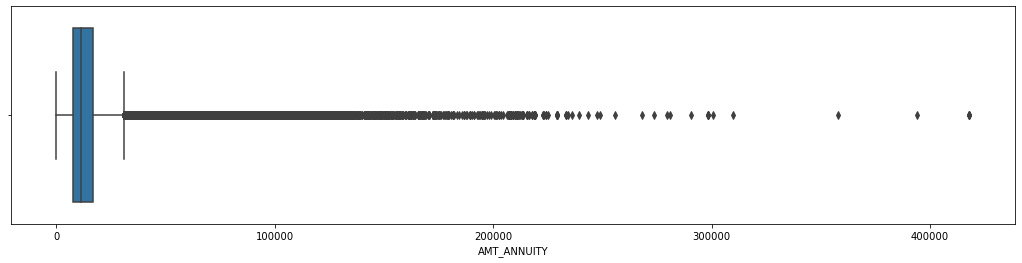

In [132]:
# Box plot for AMT_ANNUITY

plt.figure(figsize = (18, 4))
sns.boxplot(prev_app_data_1['AMT_ANNUITY'])
plt.show()

In [133]:
# Different percentiles of the AMT_ANNUITY variable

prev_app_data_1['AMT_ANNUITY'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25     7545.76875
0.50    11250.00000
0.75    16828.51500
0.90    30225.93300
0.95    41971.45275
0.99    65758.50000
Name: AMT_ANNUITY, dtype: float64

In [134]:
# Creating bins for AMT_ANNUITY

prev_app_data_1['LOAN_INSTALMENT'] = pd.cut(x=prev_app_data_1['AMT_ANNUITY'],
                                    bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, 500000],
                                    labels=['<5k', '5k - 10k', '10k - 20k', '20k - 30k', '30k - 40k', '40k - 50k', '>50k'])

In [135]:
prev_app_data_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'LOAN_INSTALMENT'],
      dtype='object')

### Univariate Analysis

[]

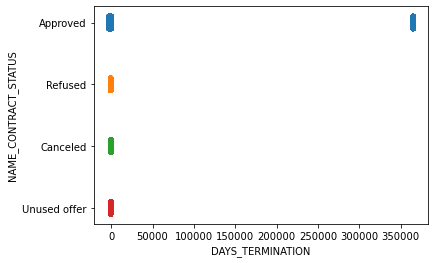

In [136]:
sns.stripplot(x='DAYS_TERMINATION', y="NAME_CONTRACT_STATUS", data=prev_app_data_1)
plt.plot()

[]

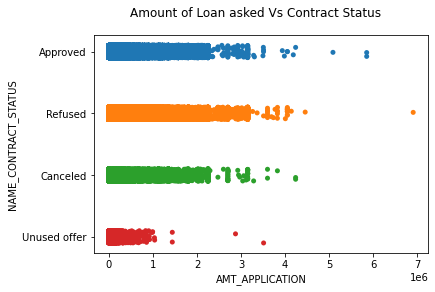

In [137]:
plt.suptitle("Amount of Loan asked Vs Contract Status")
sns.stripplot(x='AMT_APPLICATION', y="NAME_CONTRACT_STATUS", data=prev_app_data_1)
plt.plot()

[]

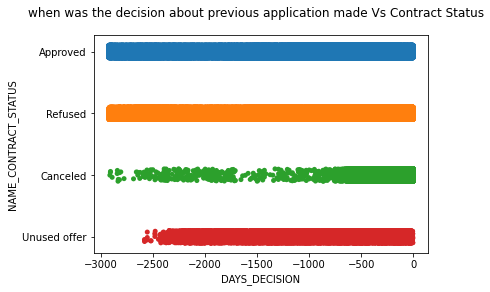

In [138]:
plt.suptitle("when was the decision about previous application made Vs Contract Status")
sns.stripplot(x= "DAYS_DECISION", y="NAME_CONTRACT_STATUS", data=prev_app_data_1)
plt.plot()

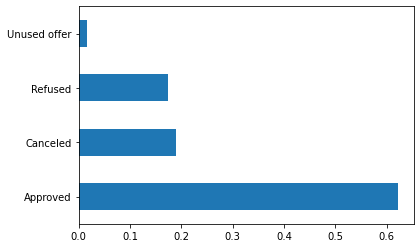

In [139]:
prev_app_data_1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
prev_app_data_1.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh()
plt.show()